Data visualization plays a crucial role in model performance evaluation by providing a comprehensive and intuitive way to assess the effectiveness of machine learning models. Here are some ways data visualization comes into play during model performance evaluation on `Classification Problem`

1. ROC AUC Curve
2. Precision-Recall Curve
3. Confusion Matrix
4. Classification Report
5. Calibration Curve


In [1]:
# first import requirement libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, auc

# Optional
# for filter warning
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
# import dataset and train model
df = pd.read_csv('../input/bank-loan-simple-dataset/example_dataset.csv')
x = df.drop('Personal Loan', axis=1)
y = df['Personal Loan']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
clf = MultinomialNB()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
y_proba = clf.predict_proba(x_test)

# 1. ROC AUC CURVE

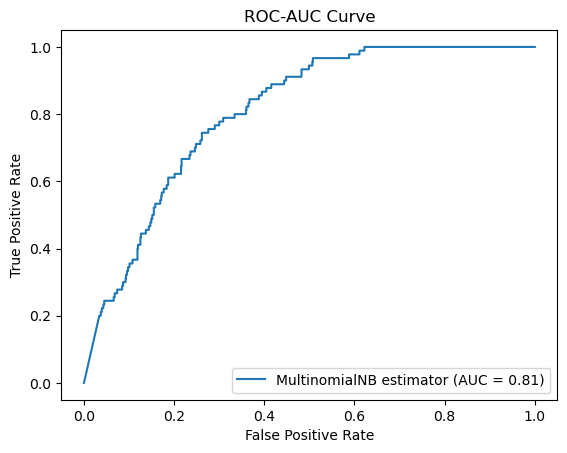

In [3]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import RocCurveDisplay
import seaborn as sns

# Plots the ROC curve using the sklearn methods
fpr, tpr, _ = roc_curve(y_test, y_proba[:, 1])
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='MultinomialNB estimator')
display.plot()
plt.title("ROC-AUC Curve")
plt.show()

# 2. Precision Recall Curve

Text(0.5, 1.0, 'PR Curve')

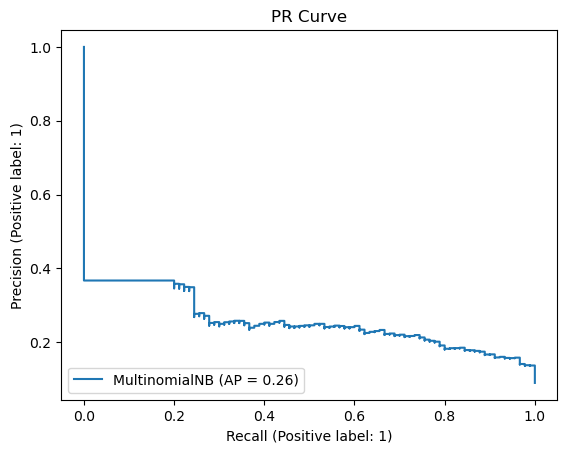

In [4]:
from sklearn.metrics import precision_recall_curve,PrecisionRecallDisplay
precision, recall, _ = precision_recall_curve(y_test, y_proba[:, 1])
PrecisionRecallDisplay.from_estimator(clf, x_test, y_test)
plt.title("PR Curve")

# plt.show()

# 3. Confusion Matrix

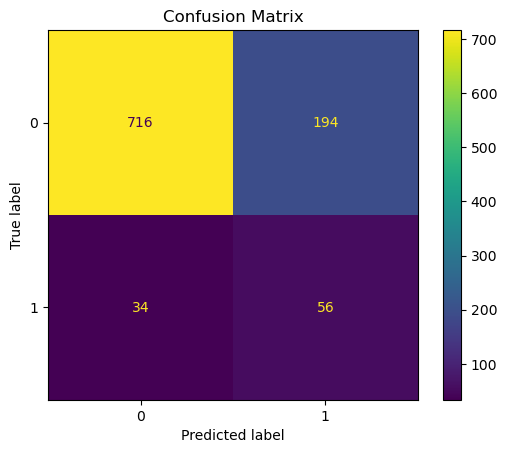

In [5]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(y_test, y_pred) 
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                            display_labels=clf.classes_)
disp.plot()
plt.title("Confusion Matrix")
plt.show()

# 4. Classification Report

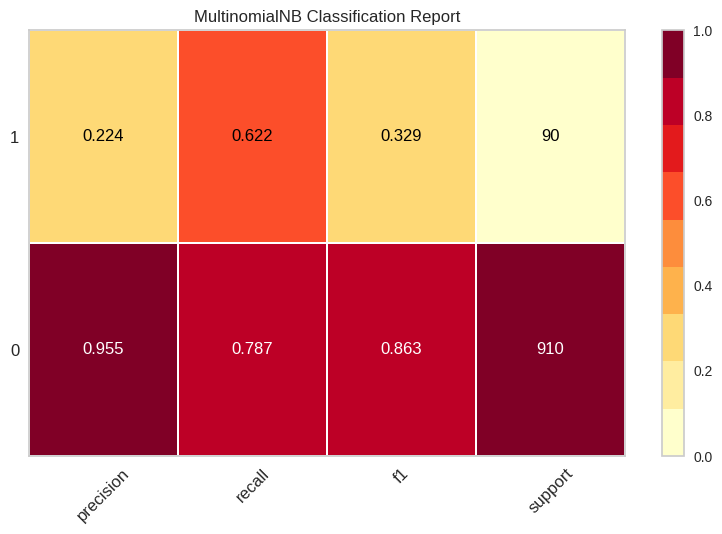

<Axes: title={'center': 'MultinomialNB Classification Report'}>

In [6]:
from yellowbrick.classifier import ClassificationReport
visualizer = ClassificationReport(clf, classes=clf.classes_, support=True)

visualizer.fit(x_train, y_train)        # Fit the visualizer and the model
visualizer.score(x_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure

# 5. Calibration Curve

Text(0.5, 1.0, 'Calibration Curve')

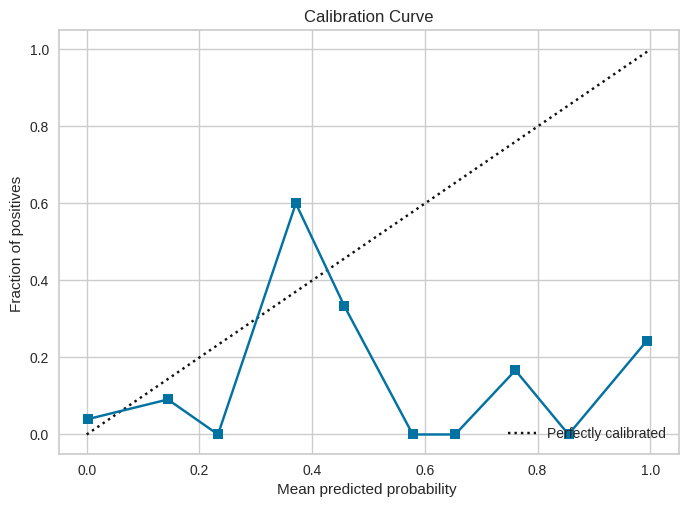

In [7]:
from sklearn.calibration import calibration_curve,CalibrationDisplay
prob_true, prob_pred = calibration_curve(y_test, y_proba[:, 1], n_bins=10)
disp = CalibrationDisplay(prob_true, prob_pred, y_proba[:, 1])
disp.plot()
plt.title("Calibration Curve")
